<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/MLweek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df =pd.read_csv("/content/drive/MyDrive/ML/titanic_test.csv")

df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(df.head())
print(df.shape)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
(418, 11)


In [9]:
from sklearn.model_selection import train_test_split
na_values=df.isna()
print(na_values)

     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     Fa

In [10]:
df.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [11]:
x_train,x_test,y_train,y_test=train_test_split(
    df.drop('Cabin',axis=1),
    df['Cabin'],
    test_size=0.2,random_state=42
)

In [12]:
constant_features =[col for col in x_train.columns if x_train[col].nunique()==1]
print(len(constant_features))

0


In [13]:
quasi_constant_features=[]
for col in x_train.columns:
  top_freq=x_train[col].value_counts(normalize=True).values[0]
  if top_freq>0.5:
    quasi_constant_features.append(col)
print(quasi_constant_features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


💡 Mutual Information Scores:
Survived       0.158108
Fare           0.086546
Ticket         0.073230
Embarked       0.033898
Cabin          0.029706
Pclass         0.023596
Age            0.023003
Parch          0.015819
PassengerId    0.000000
SibSp          0.000000
Name           0.000000
dtype: float64


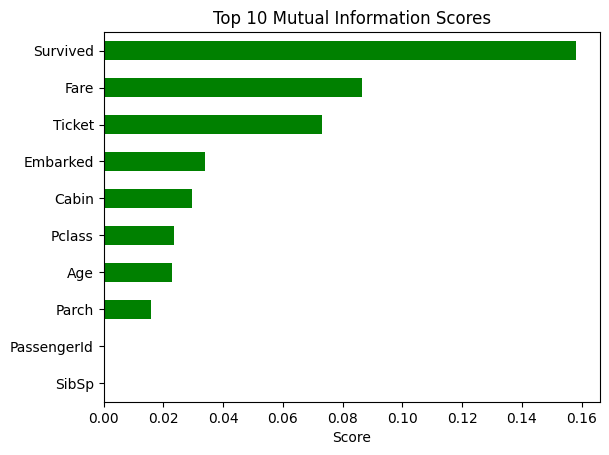

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# --- Load your dataset ---
df = pd.read_csv("/content/drive/MyDrive/ML/titanic_train.csv")

# --- Define features and target ---
X = df.drop(columns=['Sex'])   # Features
y = df['Sex']                  # Target

from sklearn.impute import SimpleImputer

# Numeric features → fill with median
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Categorical features → fill with most frequent value
cat_cols = X.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])


# --- Encode categorical variables ---
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# --- Calculate Mutual Information ---
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# --- Put results into a Series ---
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("💡 Mutual Information Scores:")
print(mi_series)

# --- Plot Top 10 ---
mi_series.head(10).plot(kind='barh', color='green')
plt.title("Top 10 Mutual Information Scores")
plt.xlabel("Score")
plt.gca().invert_yaxis()  # Highest score at top
plt.show()


In [14]:
corr_matrix = x_train.select_dtypes(include=['number']).corr()
# Pairs with high correlation
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


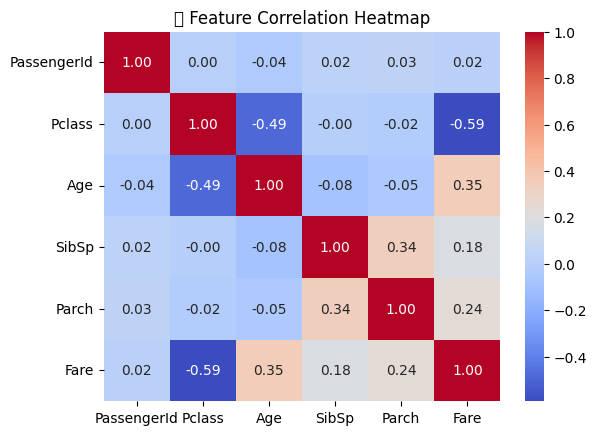

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔶 Feature Correlation Heatmap")
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split


variables = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

data = pd.read_csv(
    "/content/drive/MyDrive/ML/titanic_train.csv",
    usecols=variables,
    na_values='?',
)
data.dropna(subset=['Embarked'], inplace=True)
print(data.head())


   Survived  Pclass     Sex  SibSp  Parch Embarked
0         0       3    male      1      0        S
1         1       1  female      1      0        C
2         1       3  female      0      0        S
3         1       1  female      1      0        S
4         0       3    male      0      0        S


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import pandas as pd

# Step 1: Separate features and target
X = data.drop(columns=['Sex'])
Y = data['Sex']

# Step 2: Encode categorical columns in X
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Step 3: Replace negative values with 0
X = X.clip(lower=0)

# Step 4: Encode Y if categorical
if Y.dtype == 'object':
    Y = LabelEncoder().fit_transform(Y.astype(str))

# Step 5: Chi-square test
chi_score, p_values = chi2(X, Y)

chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi Square Score': chi_score,
    'P Values': p_values
}).sort_values('Chi Square Score', ascending=False)

print(chi_df)


    Feature  Chi Square Score      P Values
0  Survived        161.029507  6.740898e-37
3     Parch         92.577136  6.475118e-22
2     SibSp         27.935332  1.254382e-07
4  Embarked          4.416079  3.560175e-02
1    Pclass          4.367405  3.663274e-02


📊 ANOVA F-test Results:
        Feature     F-Score       P-Value
3           Sex  372.405724  1.406066e-69
1        Pclass  115.031272  2.537047e-25
8          Fare   63.030764  6.120189e-15
9         Cabin   28.314882  1.305745e-07
10     Embarked   25.717286  4.811093e-07
7        Ticket   24.740828  7.871168e-07
6         Parch    5.963464  1.479925e-02
4           Age    3.761528  5.276069e-02
2          Name    2.932903  8.713998e-02
5         SibSp    1.110572  2.922439e-01
0   PassengerId    0.022285  8.813658e-01


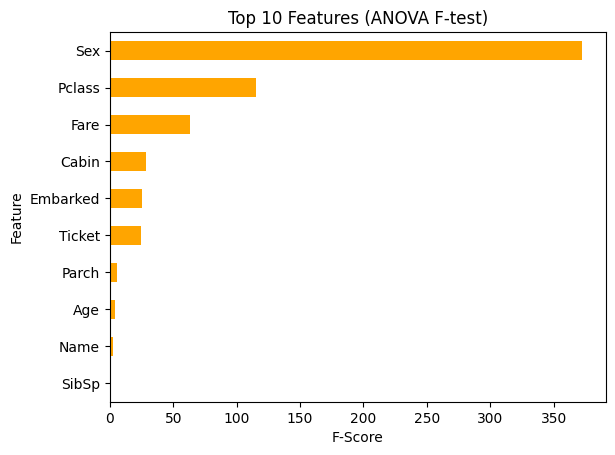

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif

# --- Load Dataset ---
df = pd.read_csv("/content/drive/MyDrive/ML/titanic_train.csv")

# --- Separate Features and Target ---
X = df.drop(columns=['Survived'])   # Features
y = df['Survived']                  # Target

# --- Handle Missing Values ---
# Fill numeric NaNs with median
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Fill categorical NaNs with most frequent value
cat_cols = X.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

# --- Encode Categorical Features ---
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# --- Perform ANOVA F-test ---
f_scores, p_values = f_classif(X, y)

# --- Store Results in DataFrame ---
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values('F-Score', ascending=False)

print("📊 ANOVA F-test Results:")
print(anova_df)

# --- Plot Top 10 Features ---
anova_df.head(10).set_index('Feature')['F-Score'].plot(kind='barh', color='orange')
plt.title("Top 10 Features (ANOVA F-test)")
plt.xlabel("F-Score")
plt.gca().invert_yaxis()
plt.show()
